In [119]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 

import data 

In [47]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [48]:
data = pd.concat([train_data, test_data])

In [49]:
data.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,614.000000
mean,384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348534
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 153
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   768 non-null    int64  
 1   no_times_pregnant      768 non-null    int64  
 2   glucose_concentration  768 non-null    int64  
 3   blood_pressure         768 non-null    int64  
 4   skin_fold_thickness    768 non-null    int64  
 5   serum_insulin          768 non-null    int64  
 6   bmi                    768 non-null    int64  
 7   diabetes pedigree      768 non-null    float64
 8   age                    768 non-null    int64  
 9   diabetes               614 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 66.0 KB


In [ ]:
data['bmi']=data.bmi.astype(int)
data['diabetes pedigree'] = data['diabetes pedigree'].astype(int)

In [65]:
train_data['bmi']=train_data.bmi.astype(int)
train_data['diabetes pedigree'] = train_data['diabetes pedigree'].astype(int)

In [91]:
test_data['bmi']=test_data.bmi.astype(int)
test_data['diabetes pedigree'] = test_data['diabetes pedigree'].astype(int)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 153
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   768 non-null    int64  
 1   no_times_pregnant      768 non-null    int64  
 2   glucose_concentration  768 non-null    int64  
 3   blood_pressure         768 non-null    int64  
 4   skin_fold_thickness    768 non-null    int64  
 5   serum_insulin          768 non-null    int64  
 6   bmi                    768 non-null    int64  
 7   diabetes pedigree      768 non-null    int64  
 8   age                    768 non-null    int64  
 9   diabetes               614 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 66.0 KB


In [ ]:
data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0.0
1,25,11,143,94,33,146,36.6,0.254,51,1.0
2,710,2,93,64,32,160,38.0,0.674,23,1.0
3,658,1,120,80,48,200,38.9,1.162,41,0.0
4,542,3,128,72,25,190,32.4,0.549,27,1.0


In [ ]:
x = data.drop(columns = 'diabetes', axis=1)
y= data['diabetes']

In [137]:
x = train_data.drop(columns =['p_id', 'diabetes'], axis=1)
y= train_data['diabetes']
test_data = test_data.drop(columns = 'p_id', axis = 1)

In [124]:
scaler = StandardScaler()
scaler.fit(x)
scaler_data = scaler.transform(x)

In [125]:
x = scaler_data
y = train_data['diabetes']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2)

In [ ]:
X_train.shape

(614, 9)

In [127]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [78]:
model = svm.SVC(kernel= 'linear')

In [128]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
training_data_accuracy = model.predict(X_train)
training_data_accuracy = accuracy_score(training_data_accuracy, y_train)
print(training_data_accuracy)

1.0


In [130]:
y_train.shape

(491,)

In [131]:
x_test_prediction = model.predict(X_test)

In [132]:
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [133]:
training_data_accuracy

1.0

In [94]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   p_id                   154 non-null    int64
 1   no_times_pregnant      154 non-null    int64
 2   glucose_concentration  154 non-null    int64
 3   blood_pressure         154 non-null    int64
 4   skin_fold_thickness    154 non-null    int64
 5   serum_insulin          154 non-null    int64
 6   bmi                    154 non-null    int64
 7   diabetes pedigree      154 non-null    int64
 8   age                    154 non-null    int64
dtypes: int64(9)
memory usage: 11.0 KB


In [134]:
sample_submission = pd.read_csv('sample_submission.csv')

In [138]:
sample_submission['diabetes']= model.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [139]:
sample_submission[sample_submission.diabetes == 0]

,p_id,diabetes
2,639,0
5,294,0
7,327,0
10,55,0
11,319,0
...,...,...
147,148,0
148,293,0
149,178,0
151,159,0


In [141]:
sample_submission.to_csv('sample_submissionn.csv')


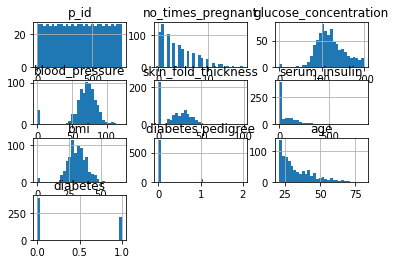

In [142]:
data.hist(bins= 30)
plt.show()